In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from datetime import datetime as date
import yfinance as yf

In [3]:
start = date(2010, 1, 1)
end = date(2021, 1, 1)

df = yf.download('AAPL', start, end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478999,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490199,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386964,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417540,447610800


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-24,131.320007,133.460007,131.100006,131.970001,129.679749,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,134.317825,124486200
2020-12-29,138.050003,138.789993,134.339996,134.869995,132.529373,121047300
2020-12-30,135.580002,135.990005,133.399994,133.720001,131.399353,96452100
2020-12-31,134.080002,134.740005,131.720001,132.690002,130.387268,99116600


In [5]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478999,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490199,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386964,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417540,447610800


In [6]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


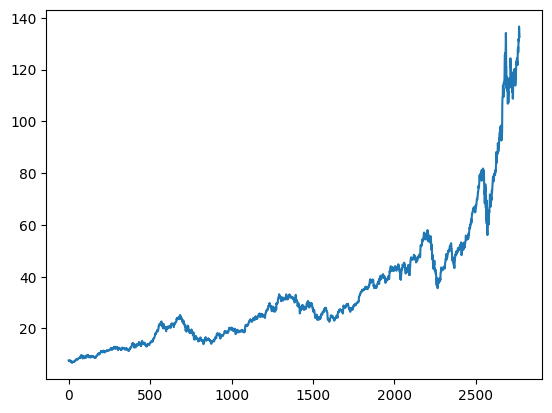

In [7]:
plt.plot(df.Close)

In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2764    118.223525
2765    118.489800
2766    118.699475
2767    118.925550
2768    119.125175
Name: Close, Length: 2769, dtype: float64

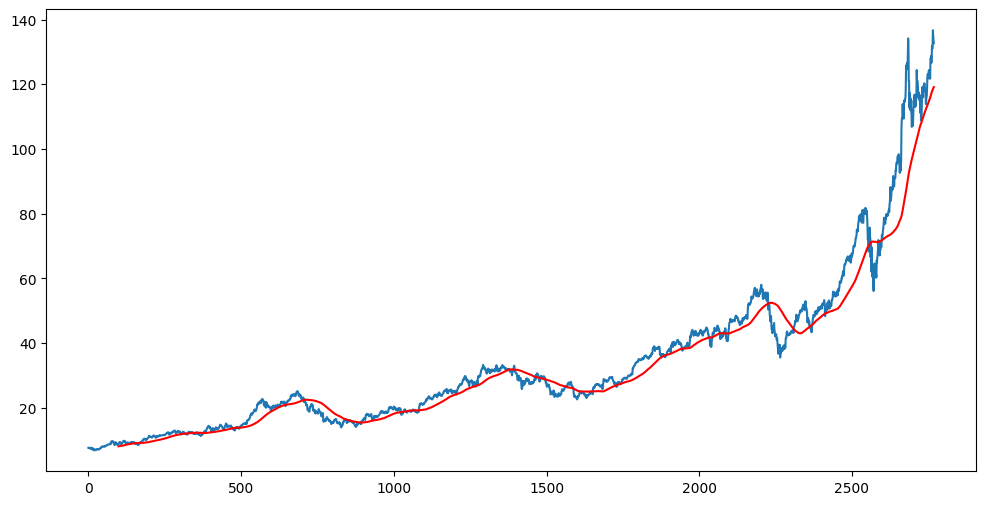

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2764     99.158737
2765     99.494725
2766     99.866312
2767    100.218837
2768    100.573950
Name: Close, Length: 2769, dtype: float64

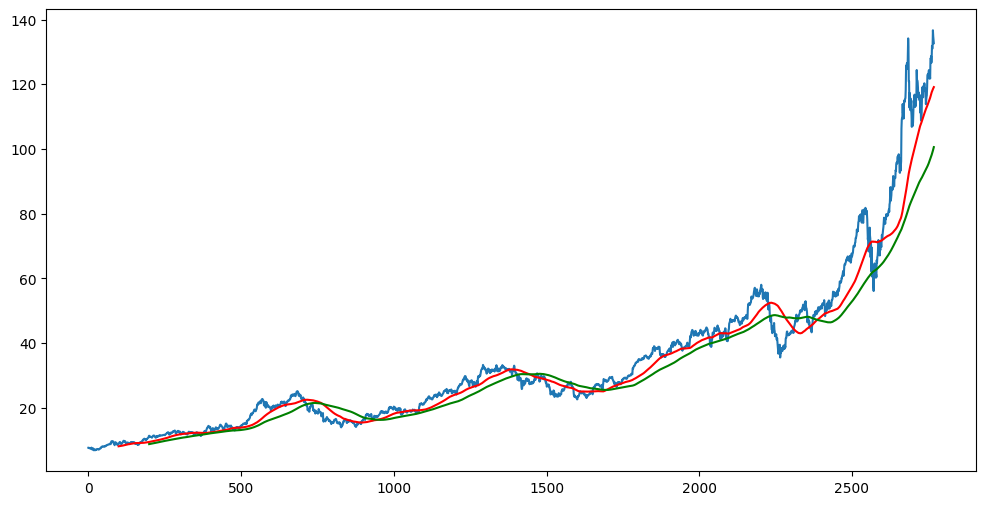

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [12]:
df.shape

(2769, 5)

In [15]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)


(1938, 1)
(831, 1)


In [16]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [17]:
data_testing.head()

,Close
1938,39.570000
1939,39.970001
1940,39.667500
1941,39.682499
1942,39.017502


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02296349],
       [0.0233504 ],
       [0.01978458],
       ...,
       [0.98133429],
       [0.97664957],
       [0.96779247]])

In [22]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [23]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [25]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

In [27]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
58/58 [==============================] - 17s 198ms/step - loss: 0.0409
Epoch 2/50
58/58 [==============================] - 15s 255ms/step - loss: 0.0088
Epoch 3/50
58/58 [==============================] - 21s 359ms/step - loss: 0.0070
Epoch 4/50
58/58 [==============================] - 17s 286ms/step - loss: 0.0069
Epoch 5/50
58/58 [==============================] - 21s 364ms/step - loss: 0.0061
Epoch 6/50
58/58 [==============================] - 16s 268ms/step - loss: 0.0061
Epoch 7/50
58/58 [==============================] - 13s 212ms/step - loss: 0.0059
Epoch 8/50
58/58 [==============================] - 11s 183ms/step - loss: 0.0062
Epoch 9/50
58/58 [==============================] - 11s 185ms/step - loss: 0.0048
Epoch 10/50
58/58 [==============================] - 10s 170ms/step - loss: 0.0051
Epoch 11/50
58/58 [==============================] - 13s 218ms/step - loss: 0.0051
Epoch 12/50
58/58 [==============================] - 13s 218ms/step - loss: 0.0044
Epoch 13/50
5

In [28]:
model.save('keras_model.h5')

In [29]:
data_testing.head()

,Close
1938,39.570000
1939,39.970001
1940,39.667500
1941,39.682499
1942,39.017502


In [30]:
past_100_days = data_training.tail(100)

In [31]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\suraj\AppData\Local\Temp\ipykernel_26996\531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [38]:
final_df.head()

,Close
0,35.910000
1,36.132500
2,35.919998
3,35.947498
4,35.912498


In [45]:
input_data = scaler.fit_transform(final_df)
input_data

array([[3.58404460e-03],
       [5.78390957e-03],
       [3.68289840e-03],
       [3.95479352e-03],
       [3.60874862e-03],
       [1.08510253e-02],
       [1.31497441e-02],
       [1.20374596e-02],
       [1.07274298e-02],
       [1.67338264e-02],
       [2.67444246e-02],
       [2.91667767e-02],
       [2.73623646e-02],
       [2.90678851e-02],
       [3.43821920e-02],
       [3.33934653e-02],
       [3.28249711e-02],
       [1.99223803e-02],
       [2.55826944e-02],
       [2.68680202e-02],
       [2.91667767e-02],
       [2.86971362e-02],
       [2.75601100e-02],
       [2.88701398e-02],
       [2.82274958e-02],
       [2.83757953e-02],
       [2.61264846e-02],
       [2.71646193e-02],
       [3.27755253e-02],
       [2.90184394e-02],
       [3.03037652e-02],
       [3.25777800e-02],
       [3.16385368e-02],
       [1.67832345e-02],
       [7.98377455e-03],
       [1.08757293e-02],
       [7.34113050e-03],
       [5.19067357e-03],
       [1.97745334e-04],
       [1.02577893e-02],


In [46]:
input_data.shape

(931, 1)

In [49]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])
    

In [51]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(831, 100, 1)
(831,)


In [52]:
y_predicted = model.predict(x_test)

26/26 [==============================] - 4s 78ms/step


In [53]:
y_predicted.shape

(831, 1)

In [54]:
y_test

array([0.03977061, 0.04372544, 0.0407346 , 0.0408829 , 0.03430804,
       0.02768371, 0.02397607, 0.02066392, 0.02706577, 0.02975997,
       0.02741181, 0.02948808, 0.02872184, 0.03037791, 0.02790615,
       0.03262723, 0.03240478, 0.03373951, 0.03388781, 0.03549448,
       0.034135  , 0.03658206, 0.04372544, 0.04518377, 0.04342881,
       0.03408556, 0.03475294, 0.0345552 , 0.03685395, 0.03514843,
       0.03762019, 0.05156092, 0.06063227, 0.06636674, 0.06105247,
       0.06406802, 0.07491904, 0.07924462, 0.0806288 , 0.08416344,
       0.0832736 , 0.08028276, 0.07855253, 0.07205179, 0.06646563,
       0.07145859, 0.06911039, 0.0686902 , 0.07650097, 0.08099959,
       0.08102429, 0.07884913, 0.07632796, 0.06745432, 0.07331241,
       0.071335  , 0.0682453 , 0.06784981, 0.06629259, 0.06705886,
       0.06718242, 0.07533924, 0.07294163, 0.07435055, 0.07422695,
       0.07855253, 0.08460834, 0.07996142, 0.07949181, 0.08112315,
       0.08112315, 0.07014856, 0.07022271, 0.07140915, 0.06683

In [55]:
y_predicted

array([[0.09313905],
       [0.09325075],
       [0.0932537 ],
       [0.09315753],
       [0.09297398],
       [0.09270251],
       [0.09232447],
       [0.09181814],
       [0.09116676],
       [0.09038442],
       [0.08951356],
       [0.08859682],
       [0.08767651],
       [0.08678943],
       [0.0859658 ],
       [0.08522278],
       [0.08457664],
       [0.08404198],
       [0.08362585],
       [0.08332884],
       [0.083148  ],
       [0.08307257],
       [0.08309071],
       [0.08321063],
       [0.08344699],
       [0.08379862],
       [0.08422628],
       [0.08467704],
       [0.08510825],
       [0.08549277],
       [0.08581305],
       [0.08606416],
       [0.08629039],
       [0.08657716],
       [0.08701533],
       [0.08765389],
       [0.08850729],
       [0.08959877],
       [0.09095055],
       [0.09256271],
       [0.09441957],
       [0.0964832 ],
       [0.09868622],
       [0.10087679],
       [0.10296565],
       [0.10487378],
       [0.10654792],
       [0.107

In [57]:
scaler.scale_

array([0.00988704])

In [58]:
scale_factor = 1/0.00988704
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

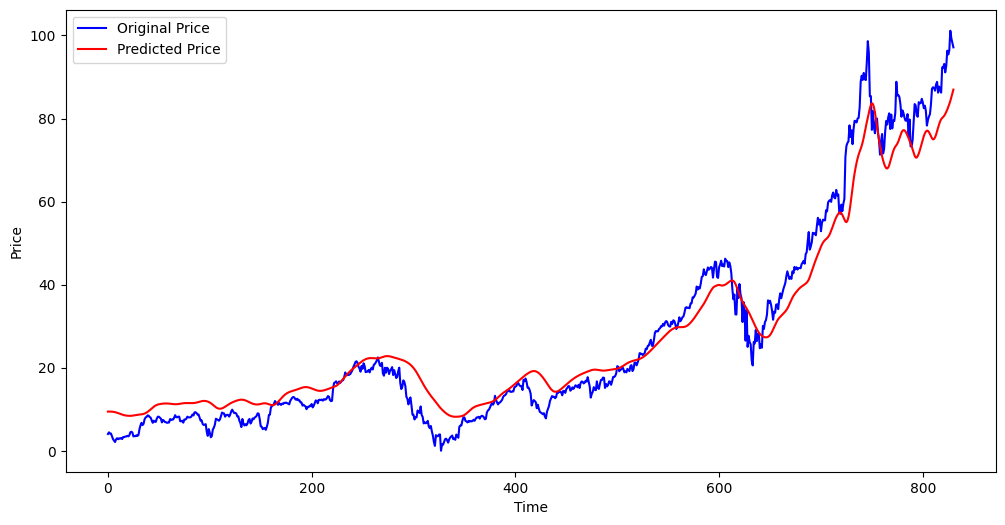

In [59]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()